In [1]:
!pip install tensorflow_text

In [32]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [34]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/collab data/spam.csv')
df.dropna(inplace=True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [35]:
import numpy as np
import pickle
import re
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Remove unknown special words
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        # Keep only text and numbers
        if token.is_alpha or token.is_digit:
            filtered_tokens.append(token.lemma_)

    # Convert to lowercase
    processed_text = " ".join(filtered_tokens).lower()

    # Remove extra spaces from everywhere
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

df['processed_message'] = df['Message'].apply(preprocess)
df


,Category,Message,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do think he go to usf he live around her...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this be the time we have try 2 contact u have ...
5568,ham,Will ü b going to esplanade fr home?,will b go to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity be in mood for that so any other suggestion
5570,ham,The guy did some bitching but I acted like i'd...,the guy do some bitching but i act like i be i...


In [36]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [37]:
df['category_encoded'] = pd.Categorical(df['Category']).codes
df

,Category,Message,processed_message,category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do think he go to usf he live around her...,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this be the time we have try 2 contact u have ...,1
5568,ham,Will ü b going to esplanade fr home?,will b go to esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",pity be in mood for that so any other suggestion,0
5570,ham,The guy did some bitching but I acted like i'd...,the guy do some bitching but i act like i be i...,0


In [38]:
import pandas as pd
# Calculate the count of each label in 'category_encoded'
label_counts = df['category_encoded'].value_counts()
# Find the label with the least count (least value label)
least_label = label_counts.idxmin()
# Get the count of the least label
least_label_count = label_counts.min()
# Downsample the DataFrame to balance the categories
df = df.groupby('category_encoded', group_keys=False).apply(lambda x: x.sample(least_label_count))
df

,Category,Message,processed_message,category_encoded
4977,ham,You are gorgeous! keep those pix cumming :) th...,you be gorgeous keep those pix cumme thank you,0
3887,ham,"Same, I'm at my great aunts anniversary party ...",same i at my great aunt anniversary party in t...,0
4309,ham,Ha ha - had popped down to the loo when you he...,ha ha have pop down to the loo when you hello ...,0
3402,ham,Thanks honey. Have a great day.,thank honey have a great day,0
2468,ham,Is there coming friday is leave for pongal?do ...,be there come friday be leave for you get any ...,0
...,...,...,...,...
8,spam,WINNER!! As a valued network customer you have...,winner as a value network customer you have be...,1
690,spam,<Forwarded from 448712404000>Please CALL 08712...,forward from 448712404000 please call 08712404...,1
3942,spam,"Free Msg: get Gnarls Barkleys ""Crazy"" ringtone...",free msg get gnarls barkleys crazy ringtone to...,1
1060,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...,eastender tv quiz what flower do dot compare h...,1


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['processed_message'],df['category_encoded'], stratify=df['category_encoded'])

In [40]:
X_train.head(4)

3272     you have 1 new voicemail please call 08719181513
3360    sorry i miss your call let talk when you have ...
167     urgent we be try to contact you last weekend d...
2225    i prefer my free day tue we d fri oso can ask ...
Name: processed_message, dtype: object

In [41]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [42]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [43]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [44]:
len(X_train)

1120

In [45]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [48]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/5
35/35 [==============================] - 13s 377ms/step - loss: 0.2473 - accuracy: 0.9339 - precision: 0.9339 - recall: 0.9339
Epoch 2/5
35/35 [==============================] - 13s 376ms/step - loss: 0.2410 - accuracy: 0.9304 - precision: 0.9463 - recall: 0.9125
Epoch 3/5
35/35 [==============================] - 12s 348ms/step - loss: 0.2408 - accuracy: 0.9268 - precision: 0.9268 - recall: 0.9268
Epoch 4/5
35/35 [==============================] - 12s 335ms/step - loss: 0.2340 - accuracy: 0.9339 - precision: 0.9402 - recall: 0.9268
Epoch 5/5
35/35 [==============================] - 12s 336ms/step - loss: 0.2338 - accuracy: 0.9330 - precision: 0.9417 - recall: 0.9232


In [49]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 305ms/step - loss: 0.2337 - accuracy: 0.9358 - precision: 0.9454 - recall: 0.9251


[0.23372745513916016,
 0.9358288645744324,
 0.9453551769256592,
 0.9251337051391602]

In [50]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 5s 360ms/step


In [51]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[177,  10],
       [ 14, 173]])

Text(50.722222222222214, 0.5, 'Truth')

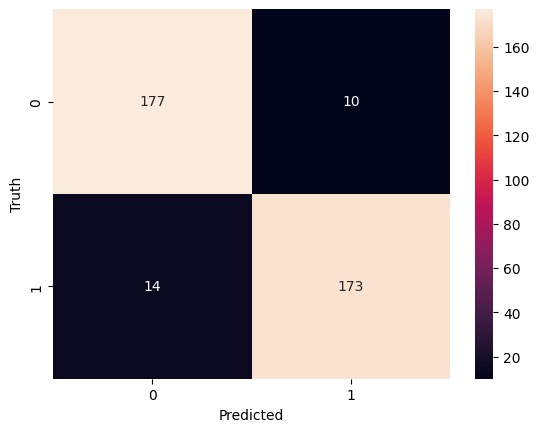

In [53]:

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')